In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# 1. Explore (un)scaled data

## 1.1. Create dataframes

In [16]:
# train_feat= pd.read_csv('train_features.csv', index_col=0)
# test_feat= pd.read_csv('test_features.csv', index_col=0)
# all_feat = pd.concat([train_feat, test_feat])
# courseinfo = pd.read_csv('course_info.csv', index_col='id')
# user_profile = pd.read_csv('user_info.csv', index_col='user_id')
# user_profile
# courseinfo

In [3]:
en_categories = ['math','physics','electrical', 'computer','foreign language', 'business', 'economics','biology','medicine','literature','philosophy','history','social science', 'art','engineering','education','environment','chemistry']
course_category_map = dict(zip(range(len(en_categories)), en_categories))
course_category_map

{0: 'math',
 1: 'physics',
 2: 'electrical',
 3: 'computer',
 4: 'foreign language',
 5: 'business',
 6: 'economics',
 7: 'biology',
 8: 'medicine',
 9: 'literature',
 10: 'philosophy',
 11: 'history',
 12: 'social science',
 13: 'art',
 14: 'engineering',
 15: 'education',
 16: 'environment',
 17: 'chemistry'}

- **Unscaled data will always be prefized by 'u_'**
- **Scaled data will be the same as unscaled without any prefix**

In [5]:
u_train_feat_df = pd.read_csv('u_train_feat.csv')
u_test_feat_df = pd.read_csv('u_test_feat.csv')
u_all_feat_df = pd.concat([u_train_feat_df, u_test_feat_df])

In [6]:
u_all_feat_df

,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,...,truth,username,course_id,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
0,772,2,2,0,0,0,0,0,0,0,...,1,5981,course-v1:TsinghuaX+70800232X+2015_T2,29,1,3,6,1333,2,14
1,773,21,21,6,4,3,0,1,0,0,...,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,2,1333,2,14
2,774,74,74,9,14,10,1,8,0,0,...,1,1072798,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,5,1333,2,14
3,776,19,19,0,3,3,1,2,0,0,...,0,561867,course-v1:TsinghuaX+70800232X+2015_T2,37,2,6,6,1333,2,14
4,777,4,4,0,0,0,0,0,0,0,...,1,1368125,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,11,1333,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67694,393203,4,4,0,0,1,0,1,0,0,...,1,29394,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,28,2,3,6,735,2,5
67695,393204,4,4,0,0,1,0,1,0,0,...,1,3238122,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,0,0,0,4,735,2,5
67696,131061,2,2,0,0,0,0,0,0,0,...,1,1103805,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,0,0,0,3,687,2,15
67697,131065,6,6,0,0,0,0,1,0,0,...,1,79648,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,31,1,1,6,687,2,15


In [7]:
train_feat_df = pd.read_csv('train_feat.csv')
test_feat_df = pd.read_csv('test_feat.csv')
all_feat_df = pd.concat([train_feat_df, test_feat_df])

In [8]:
all_feat_df.columns

Index(['enroll_id', 'all#count', 'session#count', 'seek_video#num',
       'play_video#num', 'pause_video#num', 'stop_video#num', 'load_video#num',
       'problem_get#num', 'problem_check#num', 'problem_save#num',
       'reset_problem#num', 'problem_check_correct#num',
       'problem_check_incorrect#num', 'create_thread#num',
       'create_comment#num', 'delete_thread#num', 'delete_comment#num',
       'click_info#num', 'click_courseware#num', 'click_about#num',
       'click_forum#num', 'click_progress#num', 'close_courseware#num',
       'truth', 'username', 'course_id', 'age', 'gender', 'education',
       'user_enroll_num', 'course_enroll_num', 'cluster_label',
       'course_category'],
      dtype='object')

## 1.2. Preliminary statistics

### Dropout by age, course category, education level 

In [10]:
# Age statistics
tot_age_counts = u_all_feat_df.groupby(['age']).size().reset_index(name='counts')
tot_age = []
idx = 0
for a in list(tot_age_counts.age):
    if a != 66:
        tot_age.append(list(tot_age_counts.counts)[idx])
    idx+=1
tot_age = tot_age[1:]
age_counts = u_all_feat_df.groupby(['age', 'truth']).size().reset_index(name='counts')
drop_age = age_counts[age_counts['truth'] == 1]
drop_age = drop_age.iloc[1:, :]
drop_age['proportion'] = drop_age['counts']/tot_age
drop_age

,age,truth,counts,proportion
2,10,1,2,1.000000
4,11,1,5,0.833333
6,12,1,6,0.545455
8,13,1,1,0.333333
10,14,1,25,0.641026
12,15,1,11,0.785714
14,16,1,71,0.739583
16,17,1,59,0.766234
18,18,1,193,0.656463
20,19,1,417,0.638591


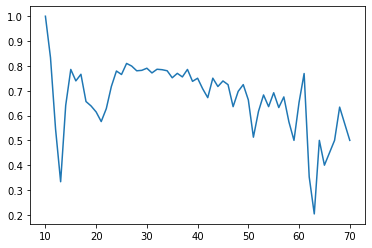

In [11]:
plt.plot(drop_age['age'], drop_age['proportion'])
plt.xlabel()

In [17]:
train = pd.read_csv('prediction_log/train_log.csv')

In [18]:
train

,enroll_id,username,course_id,session_id,action,object,time
0,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,NaN,2015-09-27T15:42:59
1,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,NaN,2015-09-27T15:43:12
2,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:37:42
3,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:27
4,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:30
...,...,...,...,...,...,...,...
29165535,466786,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,click_courseware,NaN,2016-04-01T21:04:38
29165536,466786,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem_get,556186425e7448e189918bafcb2ff30b,2016-04-01T21:04:38
29165537,466786,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem_get,1757e4fd85994ba9a2350780f96da89e,2016-04-01T21:04:38
29165538,466786,2659552,course-v1:TsinghuaX+AP000001X+2016_T1,dff9476c7f05f26a69a06506fe471668,problem_get,686d5efcd27845379b4b90e41ece181d,2016-04-01T21:04:38


In [114]:
# Filter by specified course_id
def users_activity_course(courseid):
    course_activity_df = train[train['course_id'] == courseid]
    course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])
    course_activity_df = course_activity_df.groupby(['username', 'time']).size().reset_index(name='counts')
    return course_activity_df

<ipython-input-114-6f640f791ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_activity_df['time'] = course_activity_df['time'].apply(lambda x: str(x)[:-9])


time,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,...,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23
username,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,7.0,0.0,0.0,0.0,7.0,0.0,2.0,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0
2469,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
2926582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
2928735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


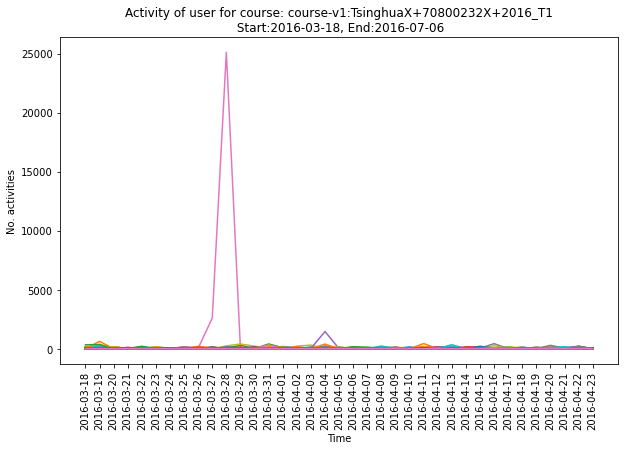

In [116]:
# course information
courseid = 'course-v1:TsinghuaX+70800232X+2016_T1'
start_date = courseinfo[courseinfo['course_id'] == courseid].start.values[0][:-9]
end_date = courseinfo[courseinfo['course_id'] == courseid].end.values[0][:-9]

course_activity_df = users_activity_course(courseid)
# pivot the data into the correct shape
df = course_activity_df.pivot(index='time', columns='username', values='counts').T#.head(5)
df.fillna(0, inplace=True)
# Plot
title = 'Activity of user for course: ' + courseid + '\n Start:' + start_date + ', End:' + end_date
ax = df.T.plot(figsize=(10, 6), legend=False, title=title)
ax.set_xlabel("Time")
ax.set_ylabel("No. activities")
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
df

In [111]:
#courseinfo[courseinfo['course_id'] == 'course-v1:TsinghuaX+AP000001X+2016_T1'].start.values[0][:-9]

'2016-03-01'